# Αυτό το αρχείο αποτελεί μια εναλλακτική προσέγγιση για την υλοποίηση της λύσης του ερωτήματος 1Α

### Αρχικά θα κάνουμε import τις βιβλιοθήκες που θα χρειαστούμε

In [1]:
from nltk.tokenize import TreebankWordTokenizer
from nltk import pos_tag

#### Τώρα δηλώνουμε το tokenaizer που θα χρησιμοποιήσουμε

In [2]:
tokenizer = TreebankWordTokenizer()

# Έξυπνη Γραμματική Διόρθωση: Αυτόματη διόρθωση κειμένου με NLP

Αυτή η Python συνάρτηση `smart_grammar_fix()` υλοποιεί έξυπνους κανόνες γραμματικής διόρθωσης χρησιμοποιώντας τεχνικές επεξεργασίας φυσικής γλώσσας.

##  Βασική Λειτουργικότητα
Η συνάρτηση αναλύει και διορθώνει συνηθισμένα γραμματικά λάθη σε αγγλικές προτάσεις μέσω:

1. **Τμηματοποίησης και POS ετικετών** (Part-of-Speech tagging)
2. Εφαρμογής **κανόνων γραμματικής με γνώση περιβάλλοντος**
3. Ανασύνθεσης της διορθωμένης πρότασης

##  Βασικές Διορθώσεις

### Κανόνας A – Συμφωνία Υποκειμένου και Ρήματος

Αν εντοπιστεί ότι το υποκείμενο της πρότασης είναι πληθυντικός (δηλαδή έχει POS ετικέτα "NNS") και ακολουθεί το ρήμα "was", τότε το ρήμα διορθώνεται σε "were". Αυτός ο κανόνας διορθώνει ασυμφωνίες αριθμού μεταξύ υποκειμένου και ρήματος, διασφαλίζοντας τη σωστή γραμματική δομή.

### Κανόνας B – Εισαγωγή του άρθρου "the" όταν λείπει

Όταν εμφανίζονται λέξεις όπως "reviewer" ή "editor" χωρίς να προηγείται άρθρο ή επίθετο, εισάγεται το άρθρο "the" πριν από αυτές. Στόχος είναι να αποκατασταθεί η φυσική ροή και η ορθότητα της αγγλικής σύνταξης, η οποία στις περισσότερες περιπτώσεις απαιτεί άρθρο μπροστά από τέτοιου τύπου ουσιαστικά.

### Κανόνας Γ – Αντικατάσταση της αντωνυμίας "it" με "they" όταν το υποκείμενο είναι πληθυντικός

Όταν το αρχικό υποκείμενο είναι πληθυντικός και στη συνέχεια γίνεται χρήση της αντωνυμίας "it", η συνάρτηση την αντικαθιστά με το "they" για να διατηρηθεί η συμφωνία αριθμού μεταξύ υποκειμένου και αντωνυμίας.

### Κανόνας Δ – Μετατροπή της έκφρασης "it/they not included" σε "it/they did not include"

Σε περιπτώσεις όπου υπάρχει η φράση "it not included" ή "they not included", η δομή μετατρέπεται στη σωστή ενεργητική μορφή "it did not include" ή "they did not include". Αυτό διορθώνει ένα συχνό λάθος που σχετίζεται με λανθασμένη χρήση του παθητικού λόγου ή ελλιπή σχηματισμό του αρνητικού ρήματος.

In [3]:
def smart_grammar_fix(sent):
    # 1) Tokenize & POS‐tag
    tokens = tokenizer.tokenize(sent)
    tags   = pos_tag(tokens)

    # We'll build a parallel list of fixed tokens
    fixed_tokens = tokens[:]

    # Figure out if the subject is plural (NNS) or singular (NN)
    subject_tag = next((t for w,t in tags if t in ('NN','NNS')), None)

    # 2) One pass over all tokens
    offset = 0
    for i, (word, tag) in enumerate(tags):
        lw = word.lower()

        # A) Plural subject + "was" → "were"
        if i>0 and lw=='was' and tags[i-1][1]=='NNS':
            fixed_tokens[i+ offset] = 'were'

        # B) Insert "the" before reviewer/editor when missing
        if lw in ('reviewer','editor') and tag in ('NN','NNS') \
           and i>0 and tags[i-1][1] not in ('DT','JJ'):
            fixed_tokens.insert(i + offset, 'the')
            offset += 1
            # No need to touch tags anymore since we won't look at them again

        # C) Plural subject → "they"
        if subject_tag=='NNS' and lw=='it':
            fixed_tokens[i+ offset] = 'they'

        # D) "it/they not included" → "it/they did not include"
        if i>=2 \
           and fixed_tokens[i-2+ offset].lower() in ('it','they') \
           and fixed_tokens[i-1 + offset].lower()=='not' \
           and lw=='included':
            pron = fixed_tokens[i-2 + offset]
            fixed_tokens[i-2 + offset :i+1 + offset] = [pron, 'did', 'not', 'include']
            offset += 1# we replaced 3 tokens with 4

    # Re-join and clean stray spaces before punctuation
    out = ' '.join(fixed_tokens)
    return out.replace(' ,',',').replace(' .','.').replace(' ?','?')

### Αυτό το σημείο αποτελεί την main του προγράμματος

In [4]:
sentence = (
    "but the updates was confusing as it not included the full feedback from reviewer or maybe editor?"
)
new_sentence=smart_grammar_fix(sentence)
print("Original:", sentence)
print("Corrected:", new_sentence)

Original: but the updates was confusing as it not included the full feedback from reviewer or maybe editor?
Corrected: but the updates were confusing as they did not include the full feedback from the reviewer or maybe the editor?


### Σωστή πρόταση από το Chat gpt 

In [5]:
chat_gpt="But the updates were confusing, as they did not include the full feedback from either the reviewer or the editor."

## Θα συγκρίνουμε την δικιά μας σωστή με αυτή του ChatGPT
Για να το καταφέρουμε αυτό, θα χρησιμοποιήσουμε τη μέθοδο TF-IDF (Term Frequency-Inverse Document Frequency) και τη συνάφεια συνημιτόνου (cosine similarity).

Αυτή η προσέγγιση μας επιτρέπει να συγκρίνουμε τις δύο διορθωμένες προτάσεις μετρώντας την ομοιότητά τους ως διανύσματα σε πολυδιάστατο χώρο:
## Βήματα:
Tokenization: Κάθε πρόταση χωρίζεται σε λέξεις (tokens).

Λεξιλόγιο: Δημιουργούμε το πλήρες λεξιλόγιο όλων των λέξεων στις δύο προτάσεις.

TF (Term Frequency): Υπολογίζουμε τη σχετική συχνότητα εμφάνισης κάθε λέξης σε κάθε πρόταση.

IDF (Inverse Document Frequency): Υπολογίζουμε πόσο "σημαντική" είναι κάθε λέξη.

TF-IDF πίνακας: Πολλαπλασιάζουμε τα TF με τα IDF για κάθε λέξη.

Συνάρτηση cosine similarity: Υπολογίζουμε την ομοιότητα των δύο προτάσεων ως διανύσματα

In [6]:
from collections import Counter
import numpy as np

sentences = [new_sentence, chat_gpt]
tokenized = [s.lower().split() for s in sentences]
vocab = sorted(set(word for doc in tokenized for word in doc))


In [7]:
tf_matrix = []
for doc in tokenized:
    word_counts = Counter(doc)
    tf_vector = [word_counts[word] / len(doc) for word in vocab]
    tf_matrix.append(tf_vector)


In [8]:
N = len(tokenized) 
df_vector = [sum(1 for doc in tokenized if word in doc) for word in vocab]
idf_vector = [np.log((N + 1) / (df + 1)) + 1 for df in df_vector]
tfidf_matrix = np.array(tf_matrix) * np.array(idf_vector)


Cosine Similarity: 0.8303270600002488


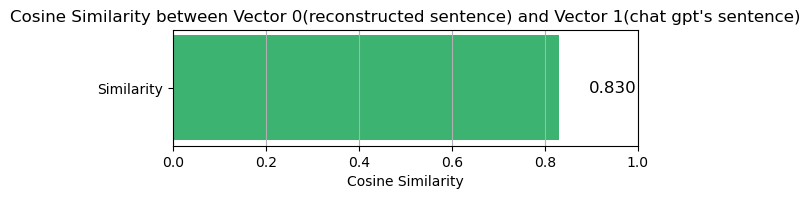

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
print(f"Cosine Similarity: {similarity}")

plt.figure(figsize=(6, 1.5))
bars = plt.barh(['Similarity'], [similarity], color='mediumseagreen')
plt.xlim(0, 1)
plt.xlabel('Cosine Similarity')
plt.title('''Cosine Similarity between Vector 0(reconstructed sentence) and Vector 1(chat gpt's sentence)''')
plt.grid(axis='x')

# Προσθήκη του αριθμού πάνω στο bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.065, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', va='center', fontsize=12)

plt.show()


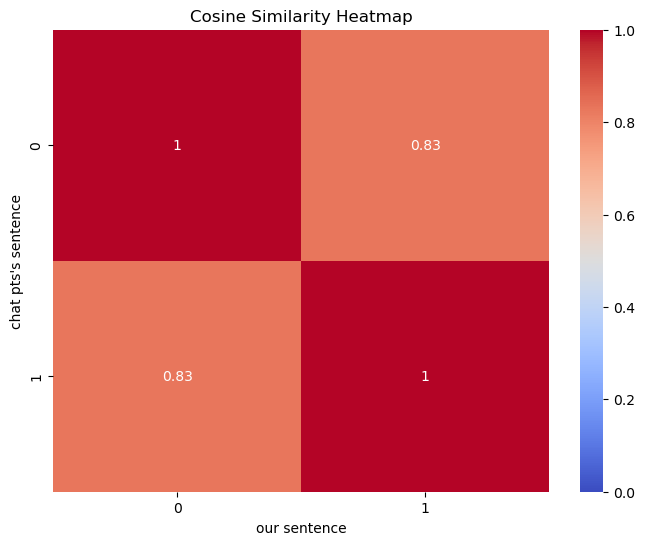

In [10]:
import seaborn as sns
n = tfidf_matrix.shape[0]
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        similarity_matrix[i, j] = cosine_similarity(tfidf_matrix[i], tfidf_matrix[j])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Cosine Similarity Heatmap')
plt.xlabel("our sentence")
plt.ylabel("chat pts's sentence")
plt.show()